# Chapter 3. 그래프와 워드클라우드

## 3.1  단어 빈도 그래프

In [1]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
file_names = gutenberg.fileids() #파일 제목을 읽어온다.
print(file_names)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [3]:
len(file_names)
for i in file_names:
    print(i)

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


In [7]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('#Num of characters used:', len(doc_alice)) #사용된 문자의 수
print(type(doc_alice))
print('#Text sample:')
print(doc_alice[:500]) #앞의 500자만 출력

#Num of characters used: 144395
<class 'str'>
#Text sample:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [8]:
doc_bible = gutenberg.open('bible-kjv.txt').read()

doc_bible

Output hidden; open in https://colab.research.google.com to view.

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
from nltk.tokenize import word_tokenize

tokens_alice = word_tokenize(doc_alice) #토큰화 실행
print('#Num of tokens used:', len(tokens_alice))
print('#Token sample:')
print(tokens_alice[:20])

#Num of tokens used: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [12]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice] #모든 토큰에 대해 스테밍 실행
print('#Num of tokens after stemming:', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#Num of tokens after stemming: 33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [14]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice] #모든 토큰에 대해 스테밍 실행
print('#Num of tokens after lemmatization:', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

[nltk_data] Downloading package wordnet to /root/nltk_data...


#Num of tokens after lemmatization: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


In [17]:
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english')) #반복이 되지 않도록 set으로 변환

result_alice = [word for word in reg_tokens_alice if word not in english_stops] #stopwords를 제외한 단어들만으로 list를 생성

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')
print(result_alice[:20])

#Num of tokens after stopword elimination: 12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [ ]:
alice_word_count = dict()

for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('#Num of used words:', len(alice_word_count))
alice_word_count

In [38]:
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
sorted_word_count[: 20]

['said',
 'alice',
 'little',
 'one',
 'know',
 'like',
 'went',
 'would',
 'could',
 'thought',
 'time',
 'queen',
 'see',
 'king',
 'began',
 'turtle',
 "'and",
 'way',
 'mock',
 'quite']

In [44]:
print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
    # repr(key): This function returns a string containing a printable representation of the key
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

#Top 20 high frequency words:
'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

print(result_alice[:10])  #stopwords를 제외한 단어들만으로 list
for word, tag in nltk.pos_tag(result_alice):
    print(word, tag)

In [53]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]
#print(my_words)

alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

#Num of used words: 1726
#Top 20 high frequency words:
'said': 462, 'alice': 293, 'little': 124, 'went': 83, 'time': 71, 'queen': 66, 'began': 58, 'way': 56, 'turtle': 56, 'mock': 55, 'thought': 54, 'thing': 49, 'voice': 48, 'head': 46, 'gryphon': 45, 'got': 44, 'rabbit': 42, 'looked': 42, 'see': 42, 'came': 40, 

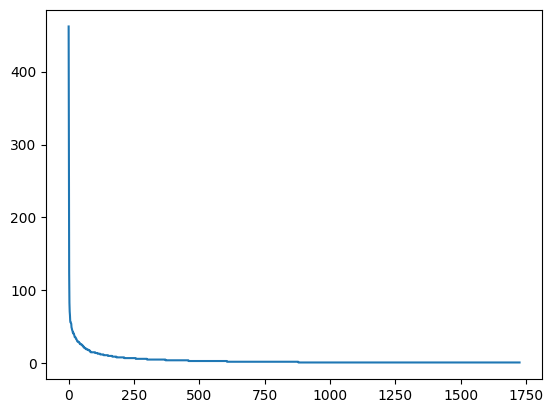

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

w = [alice_word_count[key] for key in sorted_word_count] #정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
plt.plot(w)
plt.show()

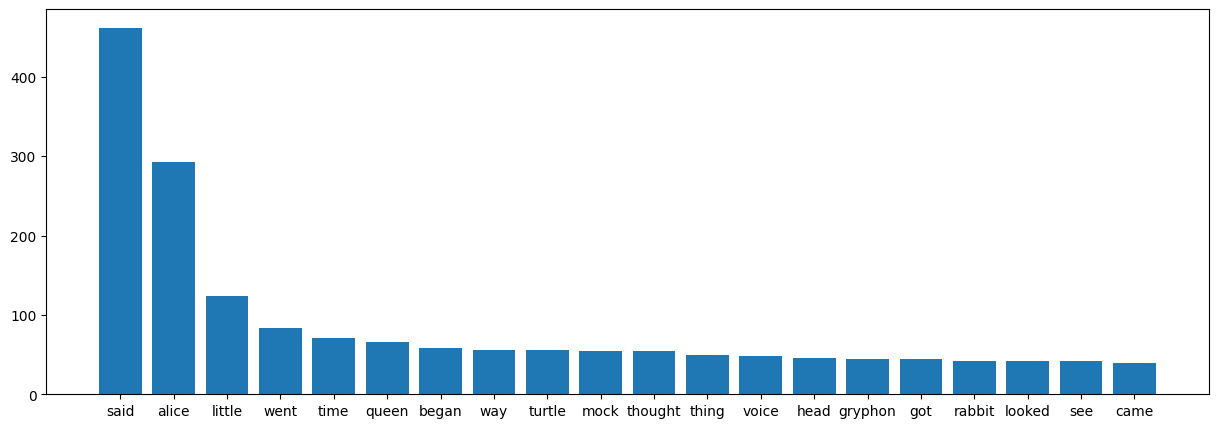

In [57]:
# Create a figure with a specific size
plt.figure(figsize=(15, 5))  # 10 inches wide by 5 inches tall

n = sorted_word_count[:20] #빈도수 상위 20개의 단어만 추출
w = [alice_word_count[key] for key in n] #추출된 단어에 대해 빈도를 추출
plt.bar(range(len(n)),w,tick_label=n) #막대그래프를 그림
plt.show()

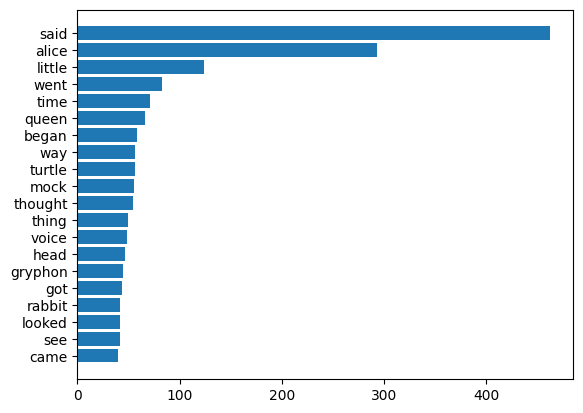

In [58]:
n = sorted_word_count[:20][::-1] #빈도수 상위 20개의 단어를 추출하여 역순으로 정렬
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)),w,tick_label=n) #수평 막대그래프
plt.show()

## 3.2 워드클라우드

In [59]:
#설치
!pip install wordcloud

In [62]:
print(type(doc_alice))
doc_alice[:100]

<class 'str'>


"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was"

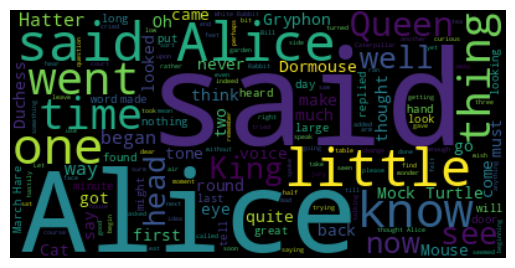

In [73]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(doc_alice)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear') #이미지를 출력
plt.show()

In [74]:
wordcloud.to_array().shape

(200, 400, 3)

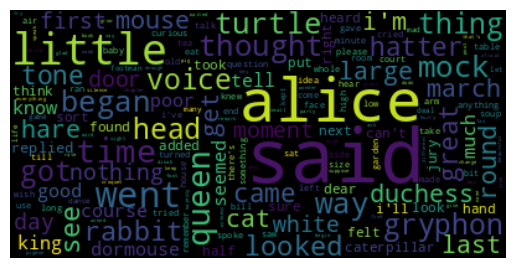

In [75]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

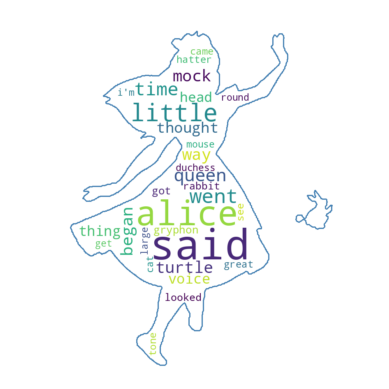

In [78]:
import numpy as np
from PIL import Image
from io import BytesIO

img_url = 'https://lovit.github.io/assets/figures/alice_mask.png'

# Download the image from the web
response = requests.get(img_url)
image_bytes = BytesIO(response.content)

# Load the image with PIL
alice_mask = np.array(Image.open(image_bytes))
# alice_mask = np.array(Image.open('alice_mask.png)) # 배경이미지를 불러와서 numpy array로 변환

wc = WordCloud(background_color="white", # 배경색 지정
               max_words=30, # 출력할 최대 단어 수
               mask=alice_mask, # 배경으로 사용할 이미지
               contour_width=3,  # 테두리선의 크기
               contour_color='steelblue') # 테두리선의 색

wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성

wc.to_file("alice.png") # 결과를 이미지 파일로 저장

# 화면에 결과를 출력
plt.figure()
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

## 3.3 한국어 문서에 대한 그래프와 워드클라우드

In [80]:
! pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 40.2 MB/s eta 0:00:00


In [1]:
from konlpy.corpus import kolaw
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc)) #가져온 데이터의 type을 확인
print(len(const_doc))
print(const_doc[:2000])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ①

In [2]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.morphs(const_doc) #형태소 단위로 tokenize

print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 8796
#앞 100개의 토큰
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


In [3]:
tokens_const = t.nouns(const_doc) #형태소 단위로 tokenize 후 명사만 추출
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3882
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


In [4]:
tokens_const = [token for token in tokens_const if len(token) > 1]  #형태소 단위로 tokenize 후 2개 글자 이상인 명사만 추출
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3013
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


In [89]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# https://giveme-happyending.tistory.com/192 [소연의_개발일지:티스토리]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 4s (2,485 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [12]:
# 폰트가 어디에 설치되어 있는지 확인
! fc-list | grep "Nanum"

/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGothic,나눔바른고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf: NanumGothic,나눔고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf: NanumSquare,나눔스퀘어:style=Regular
/us

In [10]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

[('조직', 18), ('국회의원', 18), ('임기', 18), ('직무', 19), ('국무총리', 19), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('권리', 21), ('의원', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


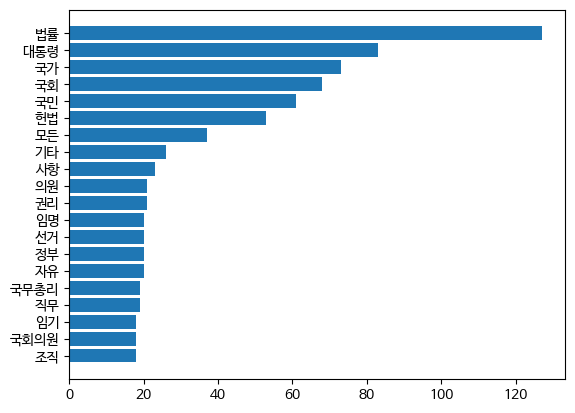

In [6]:
# from matplotlib import font_manager, rc
# import platform

# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# 맥인 경우에는 아래와 같이 font_name을 지정
# font_name = 'AppleGothic'
# rc('font', family=font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):

    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)

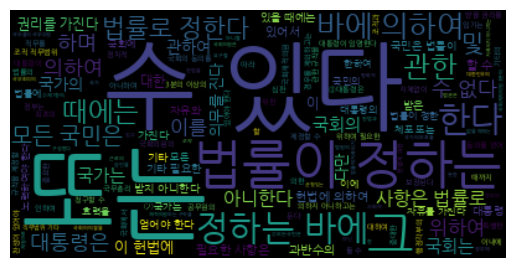

In [13]:
# font_path = 'c:/Windows/Fonts/malgun.ttf'
# 맥인 경우에는 아래와 같이 font_path를 지정
# font_path = 'AppleGothic'
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path = font_path).generate(const_doc)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

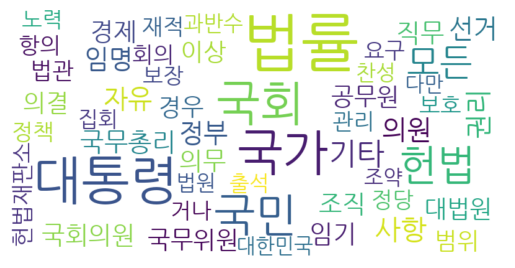

In [14]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, #이미지 너비 지정
    height = 400, #이미지 높이 지정
    background_color='white', #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt) #원문이 아닌 형태소 분석 결과로부터 워드클라우드를 생성
wordcloud.to_file("const.png") #생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

![](wordcloud.png)

![](wordcloud_n.png)